## Altering Hyperparameters and Their Resulting Effects on the Performance of a Multilayer Perceptron Classifier When Automatically Detecting Pulsar Candidates From Sky Survey Data.
<br>
The multilayer perceptron (MLP) classifier is an algorithm that leverages many artificial "neurons" in its construction, configured in multiple layers. We will execute a series of structured, orderly changes and observe the effects on certain metrics, while gaining an intuitive understanding of the results when invoking certain high-level, or "hyper" parameters. We will plot the changes in resulting true positive rate (recall) and accuracy, as a function of the parameter settings.

### Summary

We began with a dimensionality reduction in order to visualize the 8-dimensional data space, reduced down to 3 principal components containing the majority of the original variance, plotted onto a 3-dimensional set of axes. The 2 classes were discernable as a set of 2 separate sweeping forms, and served to provide an intuitive understanding of the separation between the 2 classes contained within the dataset.

After normalizing the 8 input features using a min-max scaling, we ran a series of MLP classifiers, from 1 hidden layer to 4 hidden layers. Each run was tested with a range of neurons from 1 to 300 (1 to 150 for layer 4), afterward examining the resulting true positive rate (recall) and moving forward with the setting with the highest recall. The resulting model contained 3 hidden layers, with a configuration of (296, 185, 155) and associated parameters. The model was able to discern, out of 4,475 out-of-sample testing observations, 377 pulsar examples correctly, and only miss 47 candidates. 

The classification report showed a precision of 0.78, average recall of 0.89, and an average f1-score of 0.83.
```
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      4051
          1       0.78      0.89      0.83       424

avg / total       0.97      0.97      0.97      4475
```


### Dataset Information

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South). The dataset was obtained through the UCI machine learning repository.

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. 

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes. 

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find. 

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a **minority positive class**, and spurious examples the majority negative class. At present multi-class labels are unavailable, given the costs associated with data annotation. 

### Feature Information

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the Delta Modulation-Signal to Noise Ratio (DM-SNR) curve. Delta modulation is a technique for analog-to-digital and digital-to-analog signal conversion. These are summarised below: 

1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4. Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve. 
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve. 
9. Class label (1 = pulsar, 0 = noise)

### Methodology

After importing the data, we will need to perform min/max scaling of the features, as the perceptron-based models are sensitive to disparate scales between features and the corresponding active range of their activation functions during training. The dataset will be split into a training and testing set, with a 75/25 split.

We will begin with 1 hidden layer, with the number of neurons ranging from 1 to 300, graphing the resulting recall and accuracy scores, with additional importance placed on the recall, as we will be placing greater importance on the detection of the labels of a minority positive class. We will then choose the ideal number and repeat the process for the next several layers.

We will use NumPy arrays as our primary data structure, and the Sci-kit Learn implementation of the MLP Classifier for our calculations. The NumPy arrays are _true, contiguous memory arrays_, able to be accessed in constant O(1) time, and are efficiently used for large matrix calculations such as needed for an artificial neural network. 

We will begin by instantiating the MLP Classifier. Each neuron in the input layer will correspond to a feature of the input dataset. Being a binary classification problem, we will use a single output neuron as the output layer, giving us a probability of being 0 or 1. There are numerous hyperparameters to be set when setting up an MLP, we will be primarily interested in the following:
- **activation**: The activation function at each neuron, producing its output as as the mapping of a continuous real number to a range of 0 to 1 (with ReLU).
- **hidden layer sizes**: The number of neurons per layer, each number in this tuple corresponds to the particular layer in the order given. 
- **solver**: The solver is the optimizer that seeks to perform the minimization of the loss function, we will be using the Adam, which is a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba. With our implementation of the MLP, the loss function is **cross-entropy**. 
- **learning rate**: We will use an initial value of 0.001, which will provide a numerical constant to control the movement toward a local optimum by a fixed numerical amount with each training step.
- **random state**: We will set the random state to 123, enabling us to reproduce our state with each run of the algorithm, giving us meaningful, reproducible results.

### Citation

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656 

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

We will begin by importing the csv text file into a dataframe object. The features will be manually named according to the feature list above.

In [2]:
features = ['mean_integ_profile', 
            'sd_integ_profile', 
            'excess_kurtosis_integ_profile', 
            'skewness_integ_profile', 
            'mean_DM-SNR_curve', 
            'sd_DM-SNR_curve', 
            'excess_kurtosis_DM-SNR_curve', 
            'skewness_DM-SNR_curve', 
            'label']
pulsar_df = pd.read_csv('HTRU2_data/HTRU_2.csv', names=features)

In [3]:
pulsar_df.head()

,mean_integ_profile,sd_integ_profile,excess_kurtosis_integ_profile,skewness_integ_profile,mean_DM-SNR_curve,sd_DM-SNR_curve,excess_kurtosis_DM-SNR_curve,skewness_DM-SNR_curve,label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
pulsar_df.shape

(17898, 9)

We have 17,898 observations in our dataframe. Before we split the dataset into the feature set and the class label, we will first check for NaN or NULL values, as well as typecheck the dataset.

In [5]:
pulsar_df.dtypes

mean_integ_profile               float64
sd_integ_profile                 float64
excess_kurtosis_integ_profile    float64
skewness_integ_profile           float64
mean_DM-SNR_curve                float64
sd_DM-SNR_curve                  float64
excess_kurtosis_DM-SNR_curve     float64
skewness_DM-SNR_curve            float64
label                              int64
dtype: object

In [6]:
pulsar_df.isnull().values.any()

False

Split the original dataset into a matrix **X**, and a vector **Y**:

In [7]:
pulsar_df_X = pulsar_df.loc[:, 'mean_integ_profile':'skewness_DM-SNR_curve']
pulsar_df_Y = pulsar_df.loc[:, 'label']

In [8]:
pulsar_df_X.head()

,mean_integ_profile,sd_integ_profile,excess_kurtosis_integ_profile,skewness_integ_profile,mean_DM-SNR_curve,sd_DM-SNR_curve,excess_kurtosis_DM-SNR_curve,skewness_DM-SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [9]:
pulsar_df_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

### Plot the scatter matrix:

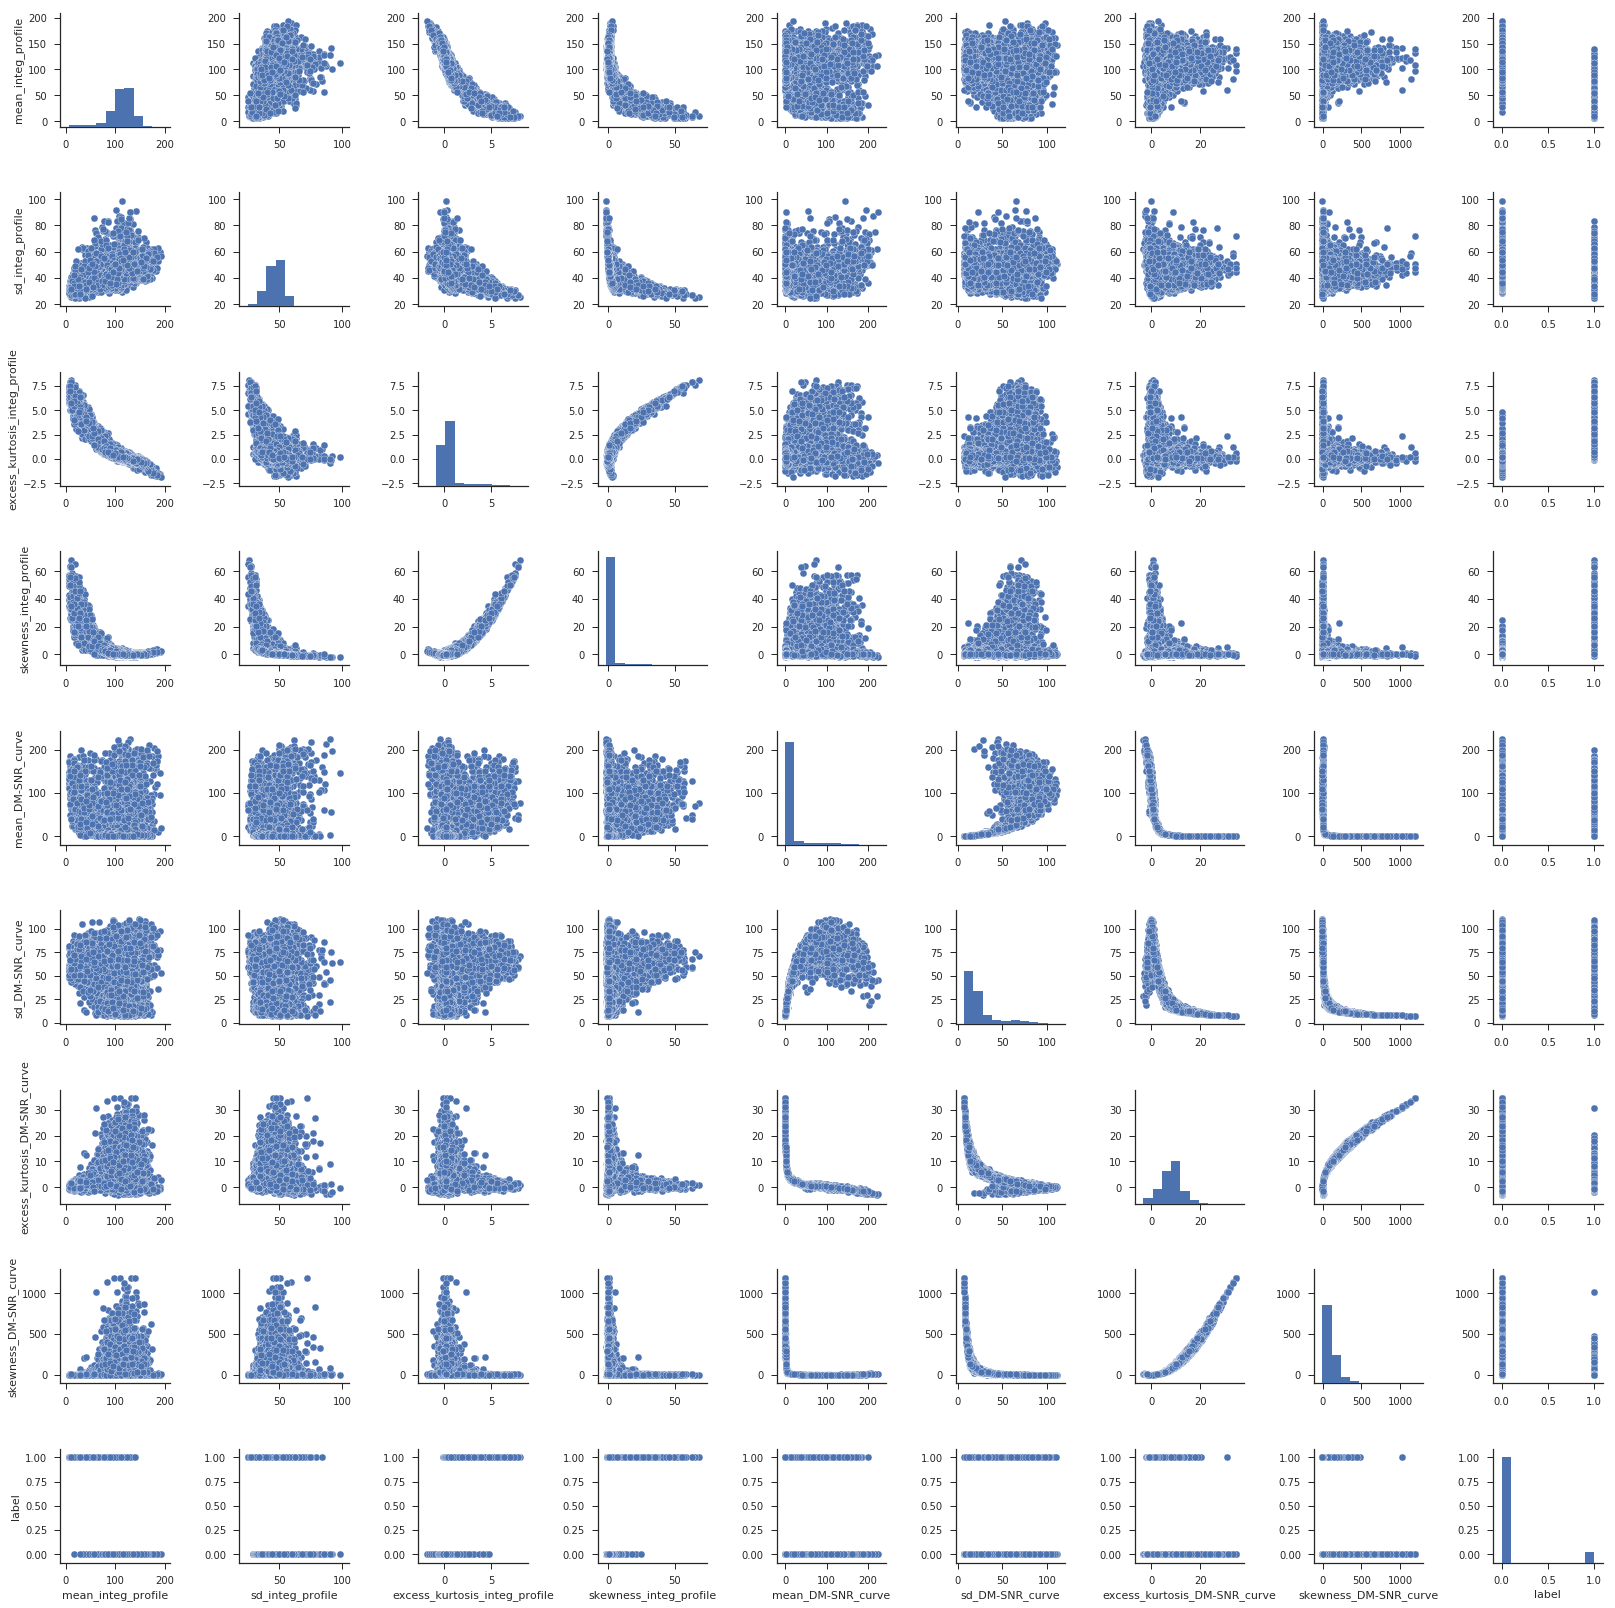

In [10]:
sns.set(style='ticks')
sns.pairplot(pulsar_df)

Looking at the scatter plot matrix, we see that the initial 4 statistics features obtained from the integrated pulse profile, 
<br>
- **mean_integ_profile**
- **sd_integ_profile**
- **excess_kurtosis_integ_profile**
- **skewness_integ_profile**<br>
*are showing more clear correlations with each other, both positive and negative. The remaining 4 features similarly obtained from the DM-SNR curve, are not showing a clear correlation with these features however.*
<br><br>
- **mean_DM-SNR_curve**
- **sd_DM-SNR_curve**
- **excess_kurtosis_DM-SNR_curve**
- **skewness_DM-SNR_curve**<br>
*are showing a less clear correlation with the above four features.*

On the bottom right, we also see the distribution of the negative and positive labels, showing that the negative samples far outnumber the positive examples. The true positive rate will probably become the most important metric with the judgement of our results.

### Plot the boxplots:

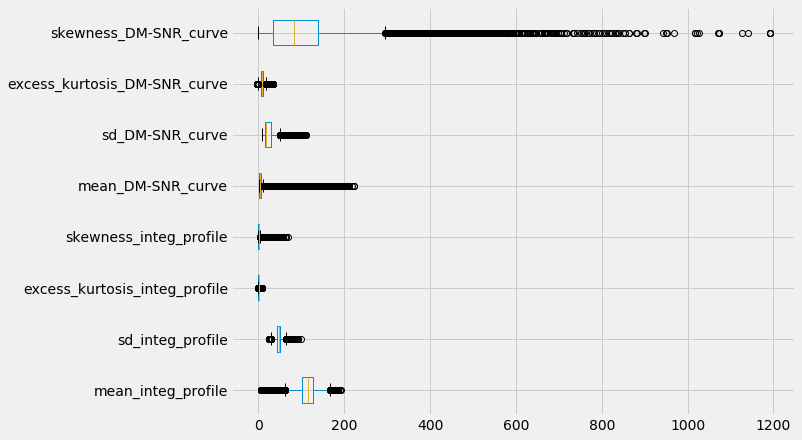

In [11]:
feat = ['mean_integ_profile', 
        'sd_integ_profile', 
        'excess_kurtosis_integ_profile', 
        'skewness_integ_profile', 
        'mean_DM-SNR_curve', 
        'sd_DM-SNR_curve', 
        'excess_kurtosis_DM-SNR_curve', 
        'skewness_DM-SNR_curve']
plt.style.use('fivethirtyeight')
pulsar_df[feat].boxplot(figsize=(9,7), sym='o', vert=False, rot=0)
plt.show()

Most of our features are showing right-skewness, with the exception of the mean of the integrated profile. All features show data points lying well outside of their inter-quartile ranges, especially above 1.5 x IQR. Seeing that this mostly appears in the latter 4 features taken from the DM-SNR curve, this may be an artifact of the curve, as the previous 4 features taken from the integrated profile do not show the skewness to the same amount. 

Perform a random split of our dataset into a training and testing set. The ratio used is 0.75 for the training set and 0.25 for testing:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pulsar_df_X, pulsar_df_Y, random_state=123)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(13423, 8)
(13423,)
(4475, 8)
(4475,)


### Scale the features of our "X" dataframes:
- Scaled to the range continuous between 0 and 1.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Take a look at the first 5 rows of the data matrix:

In [15]:
X_train[0:5, :]

array([[ 0.61938214,  0.37618228,  0.17517469,  0.01999068,  0.01200134,
         0.09602715,  0.33231736,  0.09550557],
       [ 0.55755396,  0.30498195,  0.22026633,  0.02346323,  0.02366385,
         0.20612431,  0.2314234 ,  0.03088694],
       [ 0.4988997 ,  0.11947861,  0.22604033,  0.07154638,  0.00164792,
         0.01073479,  0.72349037,  0.57862406],
       [ 0.70414727,  0.3219762 ,  0.15981134,  0.02640718,  0.00962956,
         0.09565007,  0.356493  ,  0.10831849],
       [ 0.5368176 ,  0.13730774,  0.23094246,  0.05518797,  0.00351146,
         0.04815535,  0.46174504,  0.19524722]])

### Plot the boxplots with the scaled features:

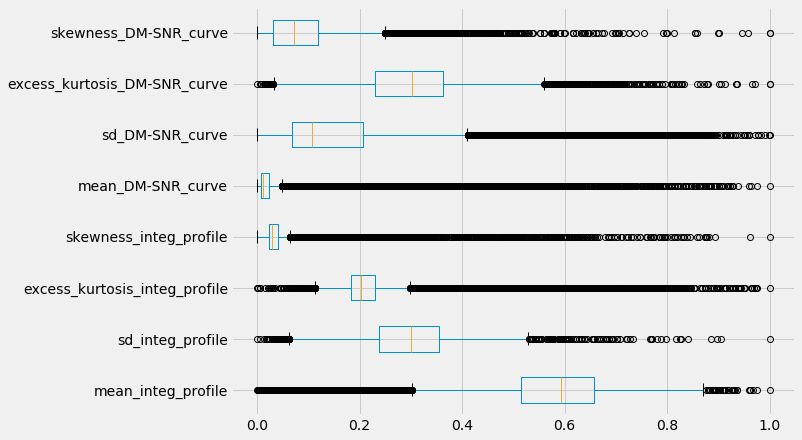

In [16]:
plt.style.use('fivethirtyeight')
plt_df = pd.DataFrame(data=X_train, columns=feat)
plt_df.boxplot(figsize=(9,7), sym='o', vert=False, rot=0)
plt.show()

We now have 13,423 training observations and 4,475 testing observations, each with 8 feature columns, each feature is now scaled to the range of 0 to 1, bringing the feature values much closer to the active range of the activation function we will be using with these perceptrons.

## Reducing the Dimensionality and Visualizing the Data:

We will perform a dimensionality reduction before visualizing the data points in 3D, reducing our dimensions from 8 down to 3:
- Can we discern visually, an intuitive sense of both classes of data: both the positive examples and the negative?
- Is there a visible formal differentiation between two groups of datapoints that is obvious?
- We will capture the maximum variance explained within 3 principal components and plot them.

In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeans2 = KMeans(2, random_state=123).fit_predict(X_train)
pca_3 = PCA(n_components=3, random_state=123)
pca_3.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
p3_train = pca_3.transform(X_train)
p3_test = pca_3.transform(X_test)

- Create a 3-dimensional scatterplot of the dimensionally-reduced data points:
- We will use the unsupervised clustering algo K-Means in order to provide a color differentiation.

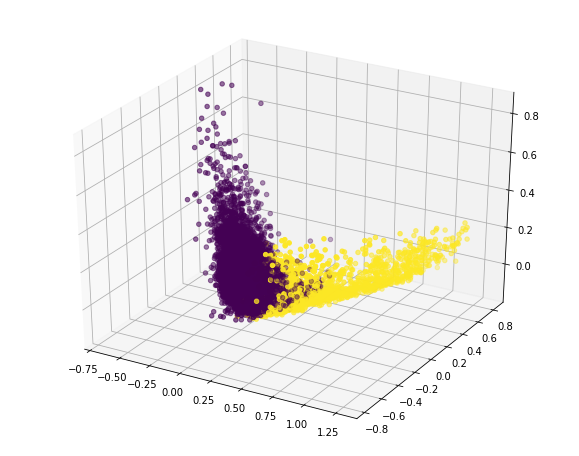

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(p3_train[:, 0]).flatten()
y_ax = np.array(p3_train[:, 1]).flatten()
z_ax = np.array(p3_train[:, 2]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = kmeans2, marker = 'o')
plt.show()

- Here, the yellow datapoints represent the positive examples, and the purple datapoints represent the majority negative class of radio-frequency noise and spurious examples.
- Rotating the axes, providing another view of the plotted datapoints:

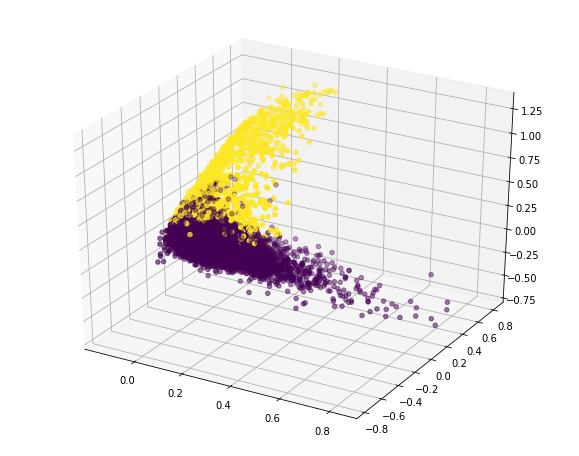

In [21]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(p3_train[:, 2]).flatten()
y_ax = np.array(p3_train[:, 1]).flatten()
z_ax = np.array(p3_train[:, 0]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = kmeans2, marker = 'o')
plt.show()

After reducing the original 8 features down to a set of 3 components that capture the majority of the original variance within the original datapoints, we can see that there is a definite, discernable difference between 2 separate classes. Here, the 2 classes have been colored as purple and yellow by unsupervised clustering, and show a difference in their respective forms within this reduced data space. The 2 classes appear almost as 2 "arms" reaching out into 2 opposite directions. This hopefully will translate into 2 discernable classes by our classification algorithm below.

Now we will proceed with the training of the models, and create a list of hidden layer sizes that we will use over each training study. Each model will be run with 1 through 300 neurons per hidden layer in an interative fashion, examining the resulting recall and accuracy afterward.

## Determine the number of hidden layers:

### Run 1: Single hidden layer in range from 1 to 300 neurons:
- Activation function: **ReLU** / Optimizer: **Adam** algorithm.

In [17]:
hidden_layer1_list = list(range(1, 301))
running_accuracy1 = []
running_recall1 = []
running_loss1 = []

In [18]:
for i in hidden_layer1_list:
    mlp_classifier1 = MLPClassifier(hidden_layer_sizes=i, 
                                    activation='relu',
                                    solver='adam', 
                                    alpha=0.0001, 
                                    batch_size='auto', 
                                    learning_rate='constant', 
                                    learning_rate_init=0.001, 
                                    power_t=0.5, 
                                    max_iter=200, 
                                    shuffle=False, 
                                    random_state=123, 
                                    tol=0.0001, 
                                    verbose=False, 
                                    warm_start=False, 
                                    momentum=0.9, 
                                    nesterovs_momentum=True, 
                                    early_stopping=False, 
                                    validation_fraction=0.1, 
                                    beta_1=0.9, 
                                    beta_2=0.999, 
                                    epsilon=1e-08)
    
    mlp_classifier1.fit(X_train, Y_train)
    running_loss1.append(mlp_classifier1.loss_)
    y_hat = mlp_classifier1.predict(X_test)
    running_accuracy1.append(accuracy_score(Y_test, y_hat))
    running_recall1.append(recall_score(Y_test, y_hat))

### Recall and Accuracy: Model 1

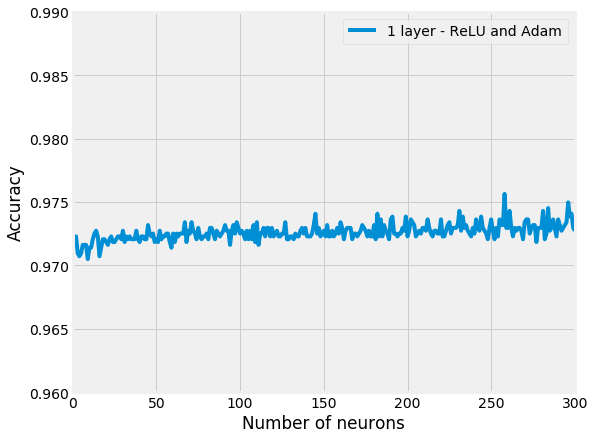

In [19]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = hidden_layer1_list
plt.plot(x_units, running_accuracy1, label='1 layer - ReLU and Adam')
plt.axis([0, 300, 0.96, 0.99])
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

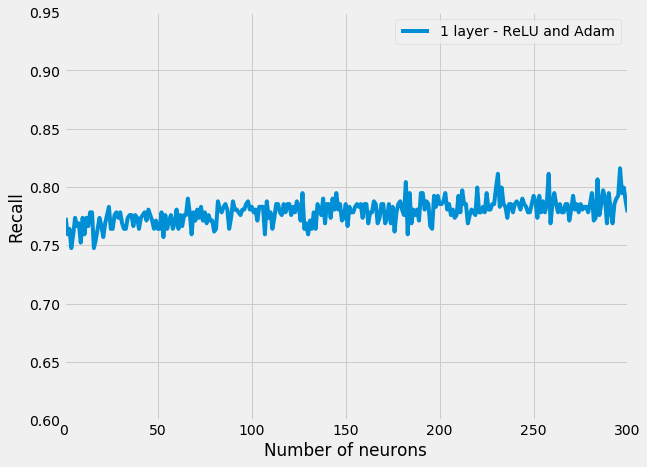

In [20]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = hidden_layer1_list
plt.plot(x_units, running_recall1, label='1 layer - ReLU and Adam')
plt.axis([0, 300, 0.6, 0.95])
plt.xlabel('Number of neurons')
plt.ylabel('Recall')
plt.legend()
plt.show()

We seem to have a relatively good initial result with the single layer model giving us a **0.81604** recall score with 296 neurons within our single hidden layer.

In [21]:
print(max(running_recall1))
x = (running_recall1.index(max(running_recall1)) + 1)
print(x)

0.816037735849
296


In [22]:
running_accuracy1[x - 1]

0.97497206703910611

296 neurons in layer 1 gives us a recall score of **0.81604**, and an accuracy score of **0.97497**.

### Run 2: L1 = 296, Second hidden layer in range from 1 to 300 neurons:
- Activation function: **ReLU** / Optimizer: **Adam** algorithm.

In [23]:
hidden_layer2_list = list(range(1, 301))
running_accuracy2 = []
running_recall2 = []
running_loss2 = []

for i in hidden_layer2_list:
    mlp_classifier2 = MLPClassifier(hidden_layer_sizes=(296, i), 
                                    activation='relu',
                                    solver='adam', 
                                    alpha=0.0001, 
                                    batch_size='auto', 
                                    learning_rate='constant', 
                                    learning_rate_init=0.001, 
                                    power_t=0.5, 
                                    max_iter=200, 
                                    shuffle=False, 
                                    random_state=123, 
                                    tol=0.0001, 
                                    verbose=False, 
                                    warm_start=False, 
                                    momentum=0.9, 
                                    nesterovs_momentum=True, 
                                    early_stopping=False, 
                                    validation_fraction=0.1, 
                                    beta_1=0.9, 
                                    beta_2=0.999, 
                                    epsilon=1e-08)
    
    mlp_classifier2.fit(X_train, Y_train)
    running_loss2.append(mlp_classifier2.loss_)
    y_hat = mlp_classifier2.predict(X_test)
    running_accuracy2.append(accuracy_score(Y_test, y_hat))
    running_recall2.append(recall_score(Y_test, y_hat))

### Recall and Accuracy: Model 2

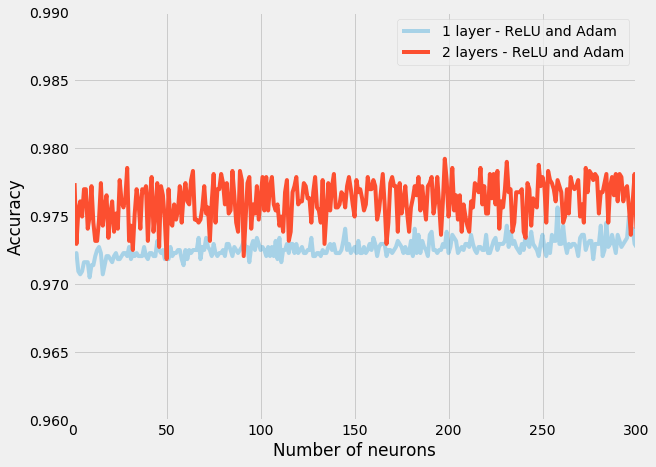

In [24]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = hidden_layer2_list
plt.plot(x_units, running_accuracy1, label='1 layer - ReLU and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy2, label='2 layers - ReLU and Adam')
plt.axis([0, 300, 0.96, 0.99])
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

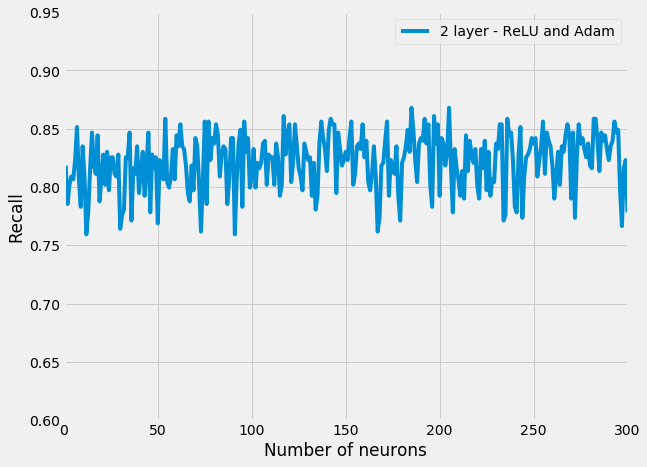

In [25]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = hidden_layer1_list
plt.plot(x_units, running_recall2, label='2 layer - ReLU and Adam')
plt.axis([0, 300, 0.6, 0.95])
plt.xlabel('Number of neurons')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [26]:
print(max(running_recall2))
x = (running_recall2.index(max(running_recall2)) + 1)
print(x)

0.867924528302
185


In [27]:
running_accuracy2[x - 1]

0.97541899441340785

296 neurons in layer 1, and 185 neurons in layer 2 gives us a recall score of **0.86792**, and an accuracy score of **0.97542**. The recall has increased drastically by adding the second hidden layer, and accuracy has also increased. 

### Run 3: L1 = 296, L2 = 185, Third hidden layer in range from 1 to 300 neurons:
- Activation function: **ReLU** / Optimizer: **Adam** algorithm.

In [28]:
hidden_layer3_list = list(range(1, 301))
running_accuracy3 = []
running_recall3 = []
running_loss3 = []

for i in hidden_layer3_list:
    mlp_classifier3 = MLPClassifier(hidden_layer_sizes=(296, 185, i), 
                                    activation='relu',
                                    solver='adam', 
                                    alpha=0.0001, 
                                    batch_size='auto', 
                                    learning_rate='constant', 
                                    learning_rate_init=0.001, 
                                    power_t=0.5, 
                                    max_iter=200, 
                                    shuffle=False, 
                                    random_state=123, 
                                    tol=0.0001, 
                                    verbose=False, 
                                    warm_start=False, 
                                    momentum=0.9, 
                                    nesterovs_momentum=True, 
                                    early_stopping=False, 
                                    validation_fraction=0.1, 
                                    beta_1=0.9, 
                                    beta_2=0.999, 
                                    epsilon=1e-08)
    
    mlp_classifier3.fit(X_train, Y_train)
    running_loss3.append(mlp_classifier3.loss_)
    y_hat = mlp_classifier3.predict(X_test)
    running_accuracy3.append(accuracy_score(Y_test, y_hat))
    running_recall3.append(recall_score(Y_test, y_hat))

### Recall and Accuracy: Model 3

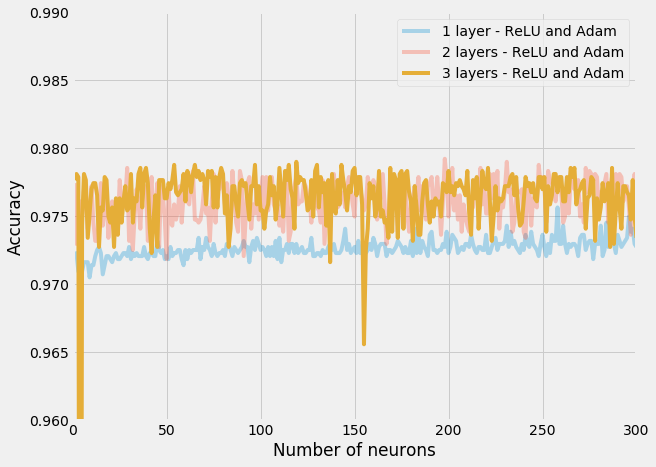

In [29]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = hidden_layer1_list
plt.plot(x_units, running_accuracy1, label='1 layer - ReLU and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy2, label='2 layers - ReLU and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy3, label='3 layers - ReLU and Adam')
plt.axis([0, 300, 0.96, 0.99])
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

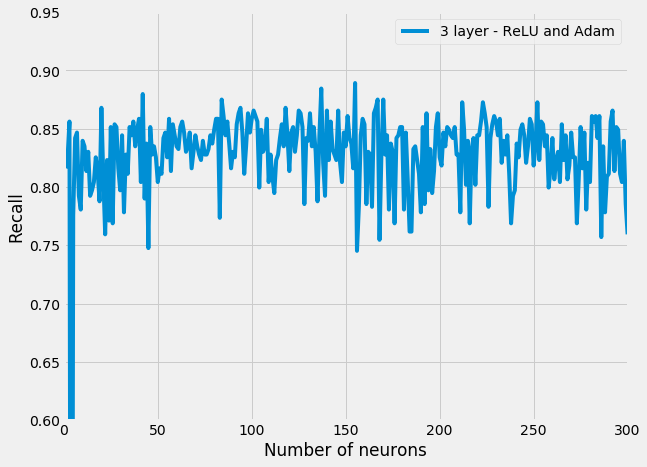

In [30]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = hidden_layer1_list
plt.plot(x_units, running_recall3, label='3 layer - ReLU and Adam')
plt.axis([0, 300, 0.6, 0.95])
plt.xlabel('Number of neurons')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [31]:
print(max(running_recall3))
x = (running_recall3.index(max(running_recall3)) + 1)
print(x)

0.889150943396
155


In [32]:
running_accuracy3[x - 1]

0.96558659217877096

296 neurons in layer 1, and 185 neurons in layer 2, and 155 neurons in layer 3 gives us a **recall score of 0.88915**, and an accuracy score of **0.96559**. The recall has increased slightly by adding the third hidden layer, and is the strongest showing so far (but accuracy has decreased). 

We appear to have reached the peak of increased performance with the 3 hidden layers. The marked increase in performance that was observed from model 1 to model 2 has not appeared with model 3, as the overall accuracy graph shows a similar mean score with peaks at approximately 0.978. There may be a point of diminishing returns with more than three layers with this model, with its additional computational expense. We will run a set of models with a 4th hidden layer, seeking to hopefully improve on our Model 3 performance.

### Run 4: L1 = 296, L2 = 185, L3 = 155, Fourth hidden layer in range from 1 to 150 neurons:
- Activation function: **ReLU** / Optimizer: **Adam** algorithm.

In [33]:
hidden_layer4_list = list(range(1, 151))
running_accuracy4 = []
running_recall4 = []
running_loss4 = []

for i in hidden_layer4_list:
    mlp_classifier4 = MLPClassifier(hidden_layer_sizes=(296, 185, 155, i), 
                                    activation='relu',
                                    solver='adam', 
                                    alpha=0.0001, 
                                    batch_size='auto', 
                                    learning_rate='constant', 
                                    learning_rate_init=0.001, 
                                    power_t=0.5, 
                                    max_iter=200, 
                                    shuffle=False, 
                                    random_state=123, 
                                    tol=0.0001, 
                                    verbose=False, 
                                    warm_start=False, 
                                    momentum=0.9, 
                                    nesterovs_momentum=True, 
                                    early_stopping=False, 
                                    validation_fraction=0.1, 
                                    beta_1=0.9, 
                                    beta_2=0.999, 
                                    epsilon=1e-08)
    
    mlp_classifier4.fit(X_train, Y_train)
    running_loss4.append(mlp_classifier4.loss_)
    y_hat = mlp_classifier4.predict(X_test)
    running_accuracy4.append(accuracy_score(Y_test, y_hat))
    running_recall4.append(recall_score(Y_test, y_hat))

### Recall and Accuracy Model 4:

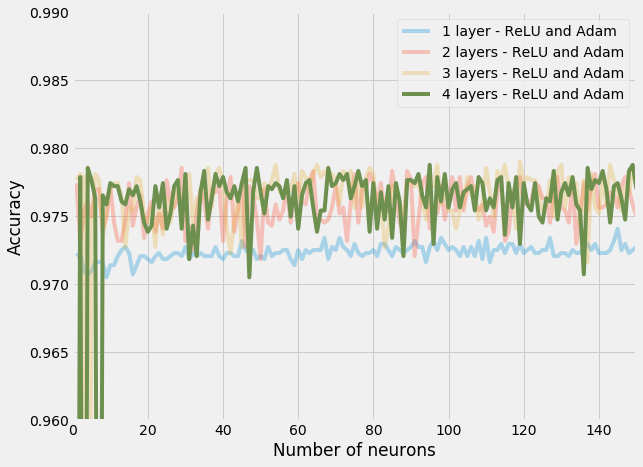

In [34]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = hidden_layer1_list[:150]
plt.plot(x_units, running_accuracy1[:150], label='1 layer - ReLU and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy2[:150], label='2 layers - ReLU and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy3[:150], label='3 layers - ReLU and Adam', alpha=0.3)
plt.plot(x_units, running_accuracy4, label='4 layers - ReLU and Adam')
plt.axis([0, 150, 0.96, 0.99])
plt.xlabel('Number of neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

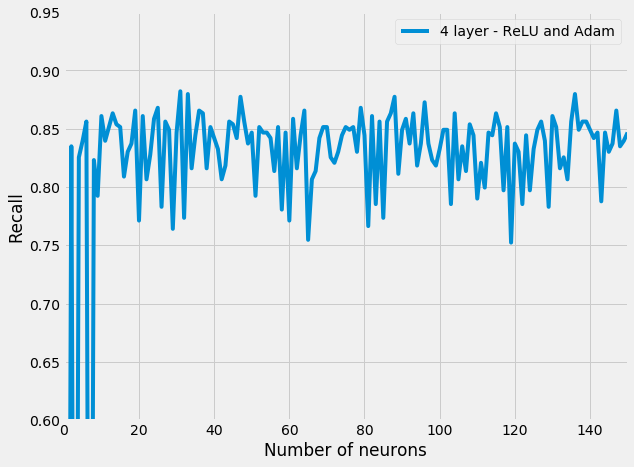

In [35]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = hidden_layer1_list[:150]
plt.plot(x_units, running_recall4, label='4 layer - ReLU and Adam')
plt.axis([0, 150, 0.6, 0.95])
plt.xlabel('Number of neurons')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [36]:
print(max(running_recall4))
x = (running_recall4.index(max(running_recall4)) + 1)
print(x)

0.882075471698
31


In [37]:
running_accuracy4[x - 1]

0.97184357541899447

With the 4 layer configuration, we achieve 0.97184 accuracy and 0.88208 recall with 31 neurons at layer 4. The recall score is fairly close to the score achieved with Model 3 above, but not quite as high, with the added computational expense of additional densely connected neurons with little gain.

Achieving an accuracy score of at least 0.97 has not been a problem for any of the models we have run so far, however the recall has been more varied with each of our model runs. The best performing model is model 3, with its use of 3 hidden layers:

### Characteristics of Our Best Model:
- **Model 3**
- Input: 8 input nodes
- Layer 1: 296 perceptrons
- Layer 2: 185 perceptrons
- Layer 3: 155 perceptrons
- Output: 1 perceptron
- Activation function: ReLU
- Optimization: Adam algo
- Constant learning rate (0.001)
- **Recall: 0.88915** 
- **Accuracy: 0.96559**

In [38]:
mlp_classifier3 = MLPClassifier(hidden_layer_sizes=(296, 185, 155), 
                                activation='relu',
                                solver='adam', 
                                alpha=0.0001, 
                                batch_size='auto', 
                                learning_rate='constant', 
                                learning_rate_init=0.001, 
                                power_t=0.5, 
                                max_iter=200, 
                                shuffle=False, 
                                random_state=123, 
                                tol=0.0001, 
                                verbose=False, 
                                warm_start=False, 
                                momentum=0.9, 
                                nesterovs_momentum=True, 
                                early_stopping=False, 
                                validation_fraction=0.1, 
                                beta_1=0.9, 
                                beta_2=0.999, 
                                epsilon=1e-08)
    
mlp_classifier3.fit(X_train, Y_train)
    
y_hat = mlp_classifier3.predict(X_test)

## Results and Findings

### The Confusion Matrix:

In [39]:
print(confusion_matrix(Y_test, y_hat))

[[3944  107]
 [  47  377]]


According to the confusion matrix, model 3 has **correctly labeled 377** pulsars and **correctly rejected 3,944** negative observations of radio frequency interference (RFI) or noise, with out-of-sample data.

The model has also incorrectly labeled **47** observations as negative. However, out of **4,475** testing observations, missing 47 pulsar candidates is a promising result, **_showing a high degree of sensitivity_**.

The model has also incorrectly labeled **107** observations as pulsars, showing a _relatively low degree of precision **(0.77893)**_. 

### The ROC Curve:

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
x, y, _ = roc_curve(Y_test, y_hat)
auc = roc_auc_score(Y_test, y_hat)

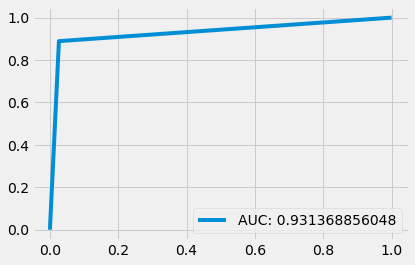

In [41]:
plt.plot(x, y, label='AUC: '+str(auc))
plt.legend()
plt.show()

The ROC curve shows relatively strong performance, even with our low level of precision, we still have a robust model producing a high true positive rate. The area under the curve is 0.93137. 

In [42]:
print(classification_report(Y_test, y_hat))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98      4051
          1       0.78      0.89      0.83       424

avg / total       0.97      0.97      0.97      4475



- The classification report shows model 3 with an average precision of 0.97, average recall of 0.97, and an average **f1-score of 0.97**. 

In summary, our third model with 3 hidden layers (296, 185, 155) and associated parameters has been able to discern, **out of 4,475 out-of-sample observations, 377 pulsar examples correctly, and only miss 47 candidates**. This is a promising result, as the vast majority of the data from the High Time Resolution Universe Pulsar Survey is RFI and noise. We purposely put greater weight on having a high recall score over accuracy, as with this problem and its relatively rare hit-rate, required a high true positive rate.